# Projeto 2: Classificação binária brest cancer com validação cruzada e dropout

## Etapa 1: Importação das bibliotecas

In [1]:
!pip install skorch==0.7.0

     |████████████████████████████████| 112kB 5.0MB/s 
  Found existing installation: skorch 0.9.0
    Uninstalling skorch-0.9.0:
      Successfully uninstalled skorch-0.9.0


In [2]:
!pip install torch==1.4.0

     |████████████████████████████████| 753.4MB 12kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [3]:
import torch
import skorch
import pandas as pd
import numpy as np
import torch.nn as nn
import seaborn as sns

from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score
torch.__version__

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


'1.4.0'

In [4]:
skorch.__version__

'0.9.0'

## Etapa 2: Base de dados

In [5]:
np.random.seed(123)
torch.manual_seed(123)

In [6]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classes = pd.read_csv('/content/saidas_breast.csv')

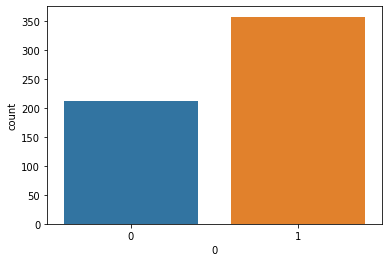

In [7]:
sns.countplot(x = '0', data=classes);

In [8]:
classes.shape

(569, 1)

In [9]:
previsores = np.array(previsores, dtype='float32')
classes = np.array(classes, dtype='float32').squeeze(1)
classes.shape

(569,)

In [10]:
type(previsores)

numpy.ndarray

In [11]:
type(classes)

numpy.ndarray

## Etapa 3: Classe para estrutura da rede neural

In [12]:
class cls_torch(nn.Module):

  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1                       ARQUITETURA DA REDE
    self.dense0 = nn.Linear(30,16)              # Ligação das entradas com a 1ª camada de neurônios
    torch.nn.init.uniform_(self.dense0.weight)  # Inicializa os pesos com uma distribuição estatística uniforme
    self.activation0 = nn.ReLU()                # Função de ativação da 1ª camada
    
    self.dense1 = nn.Linear(16,16)              # Ligação da 1º camada com a 2º camada de neurônios
    torch.nn.init.uniform_(self.dense1.weight)  # Inicializa os pesos com uma distribuição estatística uniforme
    self.activation1 = nn.ReLU()                # Função de ativação da 2ª camada
    
    self.dense2 = nn.Linear(16,1)               # Ligação da 2º camada com a camada de saída
    torch.nn.init.uniform_(self.dense2.weight)  # Inicializa os pesos com uma distribuição estatística uniforme
    self.output = nn.Sigmoid()                  # Função de ativação da 3ª camada (Output)

  def forward(self, X):
    """
    Recebe as entradas e faz a transmição de uma camada para outra até a saída
    :param X: Entrada no formato Numpy Array
    :return: Saída das previsões (Probabilidades)
    """
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X


In [13]:
cls_sklearn = NeuralNetBinaryClassifier(module=cls_torch,
                                        criterion=torch.nn.BCELoss,
                                        optimizer=torch.optim.Adam,
                                        lr=0.001,
                                        optimizer__weight_decay=0.0001,
                                        max_epochs=100,
                                        batch_size=10,
                                        train_split=False)

## Etapa 5: Validação curzada

In [14]:
results = cross_val_score(cls_sklearn, previsores, classes, cv = 10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       10.2537  0.1739
      2       10.2537  0.0741
      3       10.2537  0.0724
      4       10.2537  0.0791
      5       10.2537  0.0785
      6       10.2537  0.0734
      7       10.2537  0.0731
      8       10.2537  0.0653
      9       10.2537  0.0871
     10       10.2537  0.0781
     11       10.2537  0.0724
     12       10.2537  0.0707
     13       10.2537  0.0706
     14       10.2537  0.0756
     15       10.2537  0.0708
     16       10.2537  0.0670
     17       10.2537  0.0702
     18       10.2537  0.0709
     19       10.2537  0.0671
     20       10.2537  0.0680
     21       10.2537  0.0738
     22       10.2537  0.0701
     23       10.2537  0.0698
     24       10.2537  0.0769
     25        4.4018  0.0696
     26        0.5466  0.0683
     27        0.5314  0.0879
     28        0.4981  0.0735
     29        0.4820  0.0869
     30        0.4769  0.0763
     31        0.4528  0.0739
     32   

In [15]:
results.shape

(10,)

In [16]:
results

array([0.84210526, 0.61403509, 0.89473684, 0.63157895, 0.89473684,
       0.92982456, 0.87719298, 0.9122807 , 0.63157895, 0.625     ])

In [17]:
media = results.mean()
media

0.7853070175438596

In [18]:
desvio = results.std()
desvio

0.13225866102617184

## Etapa 6: Dropout

In [19]:
class cls_torch(nn.Module):

  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1                       ARQUITETURA DA REDE
    self.dense0 = nn.Linear(30,16)              # Ligação das entradas com a 1ª camada de neurônios
    torch.nn.init.uniform_(self.dense0.weight)  # Inicializa os pesos com uma distribuição estatística uniforme
    self.activation0 = nn.ReLU()                # Função de ativação da 1ª camada
    self.dropout0 = nn.Dropout(0.2)             
    
    self.dense1 = nn.Linear(16,16)              # Ligação da 1º camada com a 2º camada de neurônios
    torch.nn.init.uniform_(self.dense1.weight)  # Inicializa os pesos com uma distribuição estatística uniforme
    self.activation1 = nn.ReLU()                # Função de ativação da 2ª camada
    self.dropout1 = nn.Dropout(0.2)    
    
    self.dense2 = nn.Linear(16,1)               # Ligação da 2º camada com a camada de saída
    torch.nn.init.uniform_(self.dense2.weight)  # Inicializa os pesos com uma distribuição estatística uniforme
    self.output = nn.Sigmoid()                  # Função de ativação da 3ª camada (Output)

  def forward(self, X):
    """
    Recebe as entradas e faz a transmição de uma camada para outra até a saída
    :param X: Entrada no formato Numpy Array
    :return: Saída das previsões (Probabilidades)
    """
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X

In [20]:
cls_sklearn = NeuralNetBinaryClassifier(module=cls_torch,
                                        criterion=torch.nn.BCELoss,
                                        optimizer=torch.optim.Adam,
                                        lr=0.001,
                                        optimizer__weight_decay=0.0001,
                                        max_epochs=100,
                                        batch_size=10,
                                        train_split=False)

In [21]:
results = cross_val_score(cls_sklearn, previsores, classes, cv = 10, scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       10.2537  0.0782
      2       10.2537  0.0778
      3       10.2537  0.0827
      4       10.2537  0.0736
      5       10.2537  0.0779
      6       10.2537  0.0748
      7       10.2537  0.0902
      8       10.2537  0.0783
      9       10.2537  0.0810
     10       10.2537  0.0896
     11       10.2537  0.0814
     12       10.2537  0.0833
     13       10.2537  0.1009
     14       10.2537  0.0872
     15       10.2537  0.0840
     16       10.2537  0.0815
     17       10.2537  0.0832
     18       10.2537  0.0891
     19       10.2537  0.0779
     20       10.2537  0.0783
     21       10.2537  0.0824
     22       10.2537  0.0789
     23       10.2537  0.0786
     24       10.2537  0.0781
     25       10.2537  0.0766
     26        4.3662  0.0851
     27        0.5871  0.0773
     28        0.5416  0.0752
     29        0.5084  0.0776
     30        0.5211  0.0885
     31        0.4759  0.0814
     32   

In [22]:
media = results.mean()
desvio = results.std()
media, desvio

(0.8278508771929826, 0.09165118856985185)

In [23]:
results

array([0.84210526, 0.80701754, 0.63157895, 0.92982456, 0.87719298,
       0.85964912, 0.85964912, 0.68421053, 0.9122807 , 0.875     ])